In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.0 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.0 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.0 MB 1.6 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.0 MB 1.6 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.0 MB 1.4 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.0 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.0 MB 1.4 MB/s eta 0:00:06
   ------------ ---


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 8.5 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 12.1 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 12.3 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 7.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.2 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 12.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv("StreamingHistory_Extended.csv")

print(df.head())
print(df.dtypes)


                     ts     username               platform  ms_played  \
0  2020-12-06T02:51:11Z  11145402699  iOS 14.2 (iPhone12,3)     145610   
1  2020-12-06T02:53:31Z  11145402699  iOS 14.2 (iPhone12,3)     138692   
2  2020-12-06T02:53:53Z  11145402699  iOS 14.2 (iPhone12,3)      22662   
3  2020-12-06T02:53:56Z  11145402699  iOS 14.2 (iPhone12,3)       2716   
4  2020-12-06T02:53:57Z  11145402699  iOS 14.2 (iPhone12,3)        116   

  conn_country user_agent_decrypted   master_metadata_track_name  \
0           AR              unknown   Hey Jude - Remastered 2015   
1           AR              unknown              Hacer un puente   
2           AR              unknown  Happy Together - Remastered   
3           AR              unknown                       Demons   
4           AR              unknown              Paint It, Black   

  master_metadata_album_artist_name master_metadata_album_album_name  \
0                       The Beatles                                1   
1 

C:\Users\49086761\AppData\Local\Temp\ipykernel_13116\1737300765.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StreamingHistory_Extended.csv")


In [ ]:
#¿Que información contiene el dataset? Describir las columnas y los tipos de datos. Pista: ¿Son todas las columnas necesarias para el análisis? ¿Son todos los registros del mismo tipo?
import pandas as pd

df = pd.read_csv("StreamingHistory_Extended.csv")
print(df.info())
print(df.head())



C:\Users\49086761\AppData\Local\Temp\ipykernel_13116\4210619023.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StreamingHistory_Extended.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125349 entries, 0 to 125348
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 125349 non-null  object
 1   username                           125349 non-null  int64 
 2   platform                           125349 non-null  object
 3   ms_played                          125349 non-null  int64 
 4   conn_country                       125349 non-null  object
 5   user_agent_decrypted               104897 non-null  object
 6   master_metadata_track_name         123953 non-null  object
 7   master_metadata_album_artist_name  123953 non-null  object
 8   master_metadata_album_album_name   123953 non-null  object
 9   spotify_track_uri                  123953 non-null  object
 10  episode_name                       168 non-null     object
 11  episode_show_name                  168 non-null     

In [6]:
#¿A partir de que fecha se registraron las reproducciones? ¿Hasta que fecha?
#to_datetime es una funcion de pandas que la usamos para pasar los milisegundos de la columna ts a datetime, fecha y hora
df["ts"] = pd.to_datetime(df["ts"])
print("Desde:", df["ts"].min())
print(" Hasta:", df["ts"].max())

Desde: 2014-06-27 18:01:15+00:00
 Hasta: 2024-05-23 23:56:20+00:00


In [7]:
#¿Cuántas canciones diferentes se escucharon en total?
# Filtrar solo canciones (descartar podcasts)
df_canciones = df[df["is_podcast"] != True]

# Contar las canciones diferentes
canciones_unicas = df_canciones["master_metadata_track_name"].nunique()

#nunique evita canciones repetidas (valores unicos)
print("Canciones diferentes escuchadas:", canciones_unicas)


Canciones diferentes escuchadas: 9708


In [ ]:
#¿Cuánto es la duración total de las reproducciones de canciones registradas? Pista: ¿Alguna columna del dataset indica la duración de la reproducción?
#la columna ms_played indica la duración de la reproducción en milisegundos
ms_totales = df_canciones["ms_played"].sum()
#sum es una funcion de pandas que suma todos los valores de la columna ms_played
#en minutos< 
ms_totales_minutos = ms_totales / (1000 * 60)
#print("Duración total de reproducciones de canciones (en minutos):", ms_totales_minutos)
#round es una funcion de python que redondea el numero a 2 decimales
redondeado = round(ms_totales_minutos, 2)
print ("Duración total de reproducciones de canciones (en minutos):", redondeado)




Duración total de reproducciones de canciones (en minutos): 207998.66


In [9]:
#¿Cuál es el artista más escuchado por tiempo total de reproducción?
df_artistas = df_canciones.groupby("master_metadata_album_artist_name")["ms_played"].sum().reset_index()
#reset_index() es una funcion de pandas que convierte el índice en una columna normal
df_artistas = df_artistas.sort_values(by="ms_played", ascending=False)
#sort_values es una funcion de pandas que ordena los valores de la columna ms_played de mayor a menor
artista_mas_escuchado = df_artistas.iloc[0]
#df_artistas.iloc[0] es una funcion de pandas que devuelve la primera fila del dataframe df_artistas
print("Artista:", artista_mas_escuchado["master_metadata_album_artist_name"])
#Ejercicio 7 El artista más escuchado (por tiempo reproducido), ¿cuál es la canción más escuchada?
cancion_mas_escuchada = df_canciones[df_canciones["master_metadata_album_artist_name"] == artista_mas_escuchado["master_metadata_album_artist_name"]]
cancion_mas_escuchada = cancion_mas_escuchada.groupby("master_metadata_track_name")["ms_played"].sum().reset_index()
cancion_mas_escuchada = cancion_mas_escuchada.sort_values(by="ms_played", ascending=False)
cancion_mas_escuchada = cancion_mas_escuchada.iloc[0]
print("Canción más escuchada:", cancion_mas_escuchada["master_metadata_track_name"])



Artista: Charly García
Canción más escuchada: Hablando a Tu Corazón


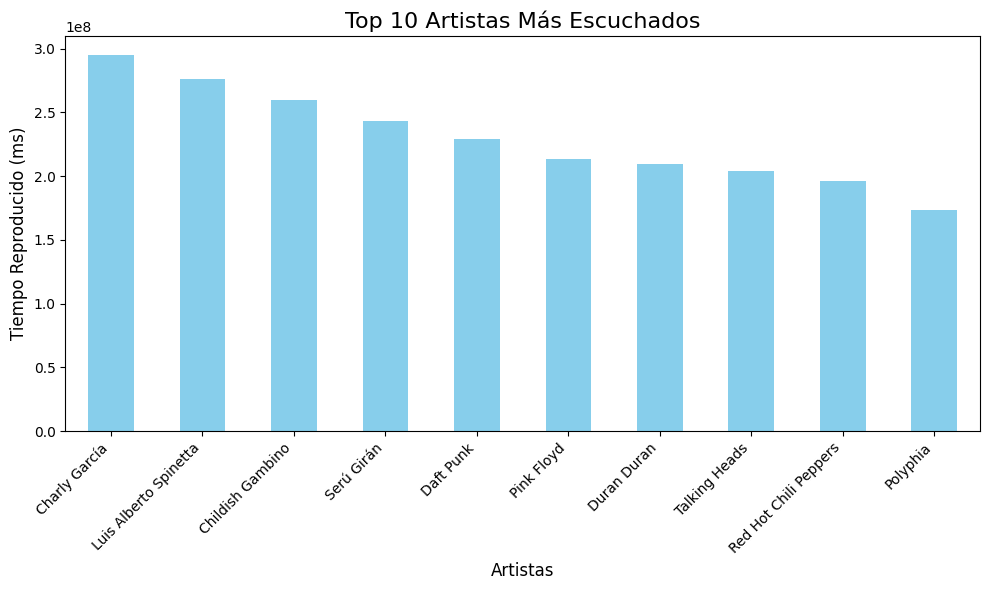

In [ ]:
#Determinar el top 10 de artistas más escuchados . Elegir un tipo de gráfico adecuado para visualizar los resualtados.
# Filtrar las filas donde el artista no sea nulo
df = df[df['master_metadata_album_artist_name'].notnull()]
#notnull 

# Agrupar por artista y sumar el tiempo de reproducción (ms_played)
artist_playtime = df.groupby('master_metadata_album_artist_name')['ms_played'].sum()
# Ordenar por tiempo de reproducción y seleccionar el Top 10
top_10_artists = artist_playtime.sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='skyblue')

# Añadir títulos y etiquetas
plt.title('Top 10 Artistas Más Escuchados', fontsize=16)
plt.xlabel('Artistas', fontsize=12)
plt.ylabel('Tiempo Reproducido (ms)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


